# 图像加工处理

### 1、方框滤波

In [3]:
import cv2 as cv
import numpy as np
#读取图像
img = cv.imread('images/horses.jpg', cv.IMREAD_UNCHANGED)
# 滤波
r = cv.boxFilter(img, -1 , (7,7) , normalize = 1)
d = cv.boxFilter(img, -1 , (3,3) , normalize = 0)

cv.namedWindow('img', cv.WINDOW_AUTOSIZE)
cv.namedWindow('r', cv.WINDOW_AUTOSIZE)
cv.namedWindow('d', cv.WINDOW_AUTOSIZE)

cv.imshow('r',r)
cv.imshow('d', d)
cv.waitKey(0)
cv.destroyAllWindows()

## 2、均值模糊

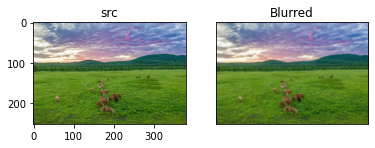

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/horses.jpg')
cv.imshow('img',img)

cv.waitKey(0)
cv.destroyAllWindows()

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.blur(img, (3, 3))
plt.subplot(121), plt.imshow(img), plt.title('src')
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3、图像滤波

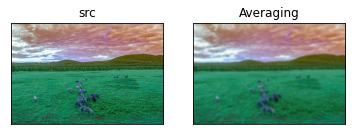

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/horses.jpg')
kernel = np.ones((5,5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)

plt.subplot(121),plt.imshow(img), plt.title('src')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### 4、高斯模糊

([], <a list of 0 Text major ticklabel objects>)

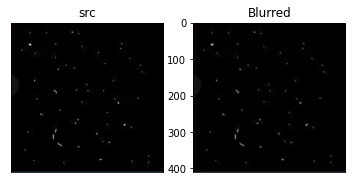

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/median.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(img, (7,7), 7)
plt.subplot(121), plt.imshow(img), plt.title('src')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([])

## 5、中值模糊

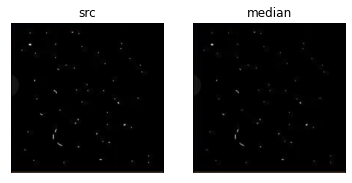

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/median.png')
median = cv.medianBlur(img, 3)

plt.subplot(121), plt.imshow(img), plt.title('src')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

## 6、双边滤波

> 关于2个sigma参数：

> 简单起见，可以令2个sigma的值相等； 如果他们很小（小于10），那么滤波器几乎没有什么效果； 
> 如果他们很大（大于150），那么滤波器的效果会很强，使图像显得非常卡通化； 

> 关于参数d：
> 过大的滤波器（d>5）执行效率低。 对于实时应用，建议取d=5； 
> 对于需要过滤严重噪声的离线应用，可取d=9； d>0时，由d指定邻域直径； 
> d<=0时，d会自动由sigmaSpace的值确定，且d与sigmaSpace成正比；

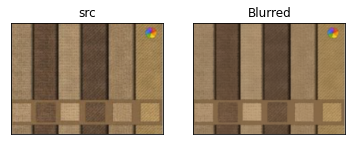

In [8]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/bilateral.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

blur = cv.bilateralFilter(img, -1, 15, 10)

plt.subplot(121), plt.imshow(img), plt.title('src')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 7、图像锐化

In [9]:
import cv2 as cv
import numpy as np

def custom_blur(image):
    #锐化
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
    dst = cv.filter2D(image, -1, kernel = kernel)
    cv.imshow('custom_blur', dst)
    
src = cv.imread('images/sharpen.png')
cv.namedWindow('ii', cv.WINDOW_AUTOSIZE)
cv.imshow('im',src)

custom_blur(src)

cv.waitKey(0)
cv.destroyAllWindows()

## 8、直方均衡化

In [3]:
import cv2 as cv
#直接读为灰度图像
img = cv.imread('images/dark.png',0)
cv.imshow('dark', img)
#cv.waitKey(0)
#调用cv2.equalizeHist函数进行直方图均衡化
img_equal = cv.equalizeHist(img)

cv.imshow('ie', img_equal)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
img = cv.imread('images/dark.png', 0)
cv.imshow('dark', img)
#调用cv2.createCLAHE函数进行局部直方图均衡化
clahe = cv.createCLAHE(clipLimit=2, tileGridSize=(30,30))
cl1 = clahe.apply(img)
cv.imshow('ie',cl1)
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
import cv2 as cv
import numpy as np
img = cv.imread('images/dark1.jpg')
cv.imshow('src', img)
# 彩色图像均衡化,需要分解通道 对每一个通道均衡化
(b, g, r) = cv.split(img)
bH = cv.equalizeHist(b)
gH = cv.equalizeHist(g)
rH = cv.equalizeHist(r)
# 合并每一个通道
result = cv.merge((bH, gH, rH))
cv.imshow('dst', result)
cv.waitKey(0)
cv.destroyAllWindows()

## 9、Gamma变化

In [4]:
import cv2 as cv
import numpy as np

img = cv.imread('images/dark1.jpg')

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype('uint8')
    print(table)
    return cv.LUT(image, table)

img_gamma = adjust_gamma(img, 0.8)
cv.imshow('img', img)
cv.imshow('img_gamma', img_gamma)

cv.waitKey(0)
cv.destroyAllWindows()

[  0   0   0   0   1   1   2   2   3   3   4   5   5   6   6   7   8   8
   9   9  10  11  11  12  13  13  14  15  16  16  17  18  19  19  20  21
  22  22  23  24  25  25  26  27  28  29  29  30  31  32  33  34  34  35
  36  37  38  39  40  40  41  42  43  44  45  46  47  47  48  49  50  51
  52  53  54  55  56  57  58  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123
 124 125 127 128 129 130 131 132 133 134 135 136 137 139 140 141 142 143
 144 145 146 147 149 150 151 152 153 154 155 157 158 159 160 161 162 163
 164 166 167 168 169 170 171 173 174 175 176 177 178 180 181 182 183 184
 185 187 188 189 190 191 192 194 195 196 197 198 200 201 202 203 204 206
 207 208 209 210 212 213 214 215 216 218 219 220 221 222 224 225 226 227
 229 230 231 232 233 235 236 237 238 240 241 242 24

# 形态学操作

### 1、腐蚀

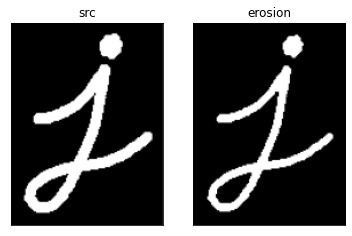

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((3, 3), np.uint8)
erosion = cv.erode(img, kernel, iterations = 1)
plt.subplot(121), plt.imshow(img), plt.title('src')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('erosion')
plt.xticks([]), plt.yticks([])

plt.show()

### kernel

In [8]:
import cv2 as cv
import numpy as np
#kernel = np.ones((5,5),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
print(kernel)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


In [1]:
import cv2 as cv

image = cv.imread('images/morphology.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
eroded = cv.erode(gray.copy(), kernel, 10)

cv.imshow('Eroded', eroded)

cv.waitKey(0)
cv.destroyAllWindows()

## 2、膨胀

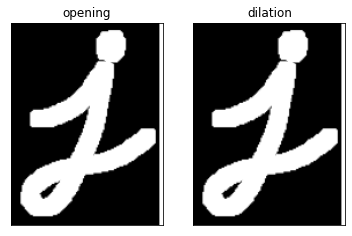

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('images/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))

dilation = cv.dilate(img, kernel, iterations = 1)
kernel1 = np.ones((7, 7), np.uint8)
opening = cv.morphologyEx(dilation, cv.MORPH_OPEN, kernel1)
plt.subplot(121),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

## 3、开运算

> 侵蚀然后扩张的另一个名称,它对于消除噪音很有用

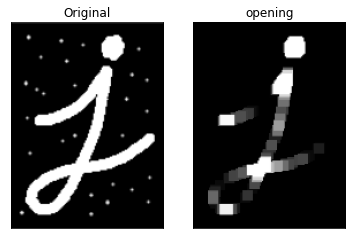

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/open.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (9,9))
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

### 4、闭运算

> 闭运算与开运算相反，先扩张然后再侵蚀。在关闭前景对象内部的小孔或对象上的小黑点时很有 用。

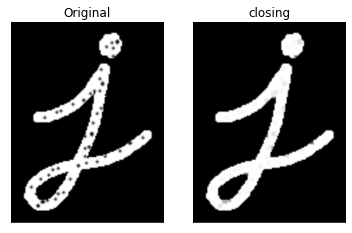

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/close.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((7,7), np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

### 5、形态学梯度

这是图像膨胀和腐蚀之间的区别。 结果将看起来像对象的轮廓。

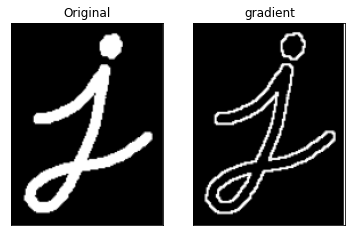

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((3,3), np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

### 6、顶帽

它是输入图像和图像开运算之差。下面的示例针对9x9内核完成。

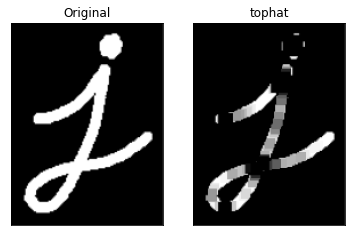

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((9,9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

### 7、黑帽

这是输入图像和图像闭运算之差

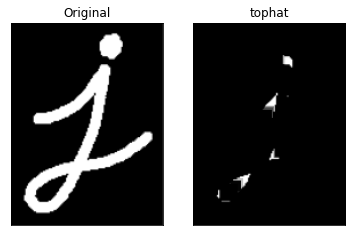

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((9,9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_BLACKHAT,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

## 8、元素结构

In [4]:
# 矩形内核
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
a = [[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]]
print(a)

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


In [5]:
# 椭圆内核
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)